In [28]:
import pandas as pd

df = pd.read_csv('fifa_players.csv')

<Axes: >

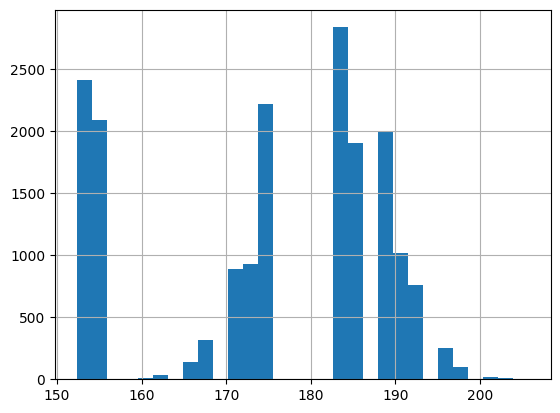

In [30]:
df['height_cm'].hist(bins=30)

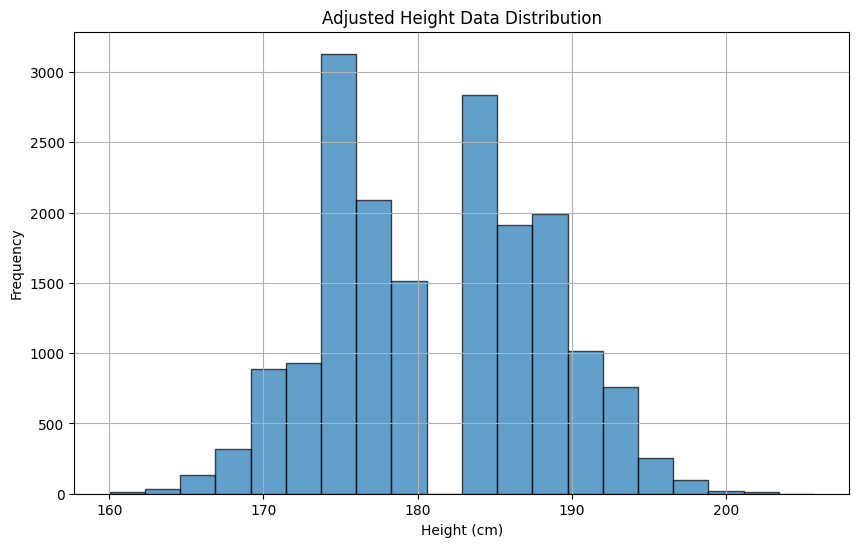

Adjusted Mean: 180.96 cm
Adjusted Standard Deviation: 6.90 cm


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your DataFrame (assuming you have it in a CSV or similar format)
# df = pd.read_csv('your_file.csv')

# Sample Data (replace this with your actual DataFrame)
# df = pd.DataFrame({'height_cm': [data values]})

# Step 1: Identify data points below 160 cm
below_160 = df['height_cm'] < 160

# Step 2: Replace values below 160 cm with random values in the range 175-180 cm
# Generate random values within 175-180 cm for the same length as the below_160 values
df.loc[below_160, 'height_cm'] = np.random.uniform(178, 185, size=below_160.sum())

# Step 3: Plot the adjusted data to check the distribution
plt.figure(figsize=(10, 6))
df['height_cm'].hist(bins=20, edgecolor='black', alpha=0.7)
plt.title('Adjusted Height Data Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

# Step 4 (Optional): Check statistics to confirm Gaussian distribution
mean = df['height_cm'].mean()
std_dev = df['height_cm'].std()

print(f"Adjusted Mean: {mean:.2f} cm")
print(f"Adjusted Standard Deviation: {std_dev:.2f} cm")


In [9]:
df1 = pd.read_csv('data.csv')
df2 = pd.read_csv('processed data/fe_missForest_data.csv')

In [10]:
df2.drop(columns=['is_star_player'], inplace=True)

In [15]:
df2.drop(columns=['release_clause_euro'], inplace=True)

In [16]:
df1.shape

(17947, 58)

In [17]:
df2.shape

(17947, 58)

In [18]:
# Tạo một DataFrame Boolean thể hiện sự khác nhau
diff = df1 != df2

# Hiển thị các dòng và cột có sự khác nhau
print("Các vị trí khác nhau:")
print(diff[diff].dropna(how='all').dropna(axis=1, how='all'))


Các vị trí khác nhau:
       preferred_foot
0                True
1                True
2                True
3                True
4                True
...               ...
17942            True
17943            True
17944            True
17945            True
17946            True

[17947 rows x 1 columns]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

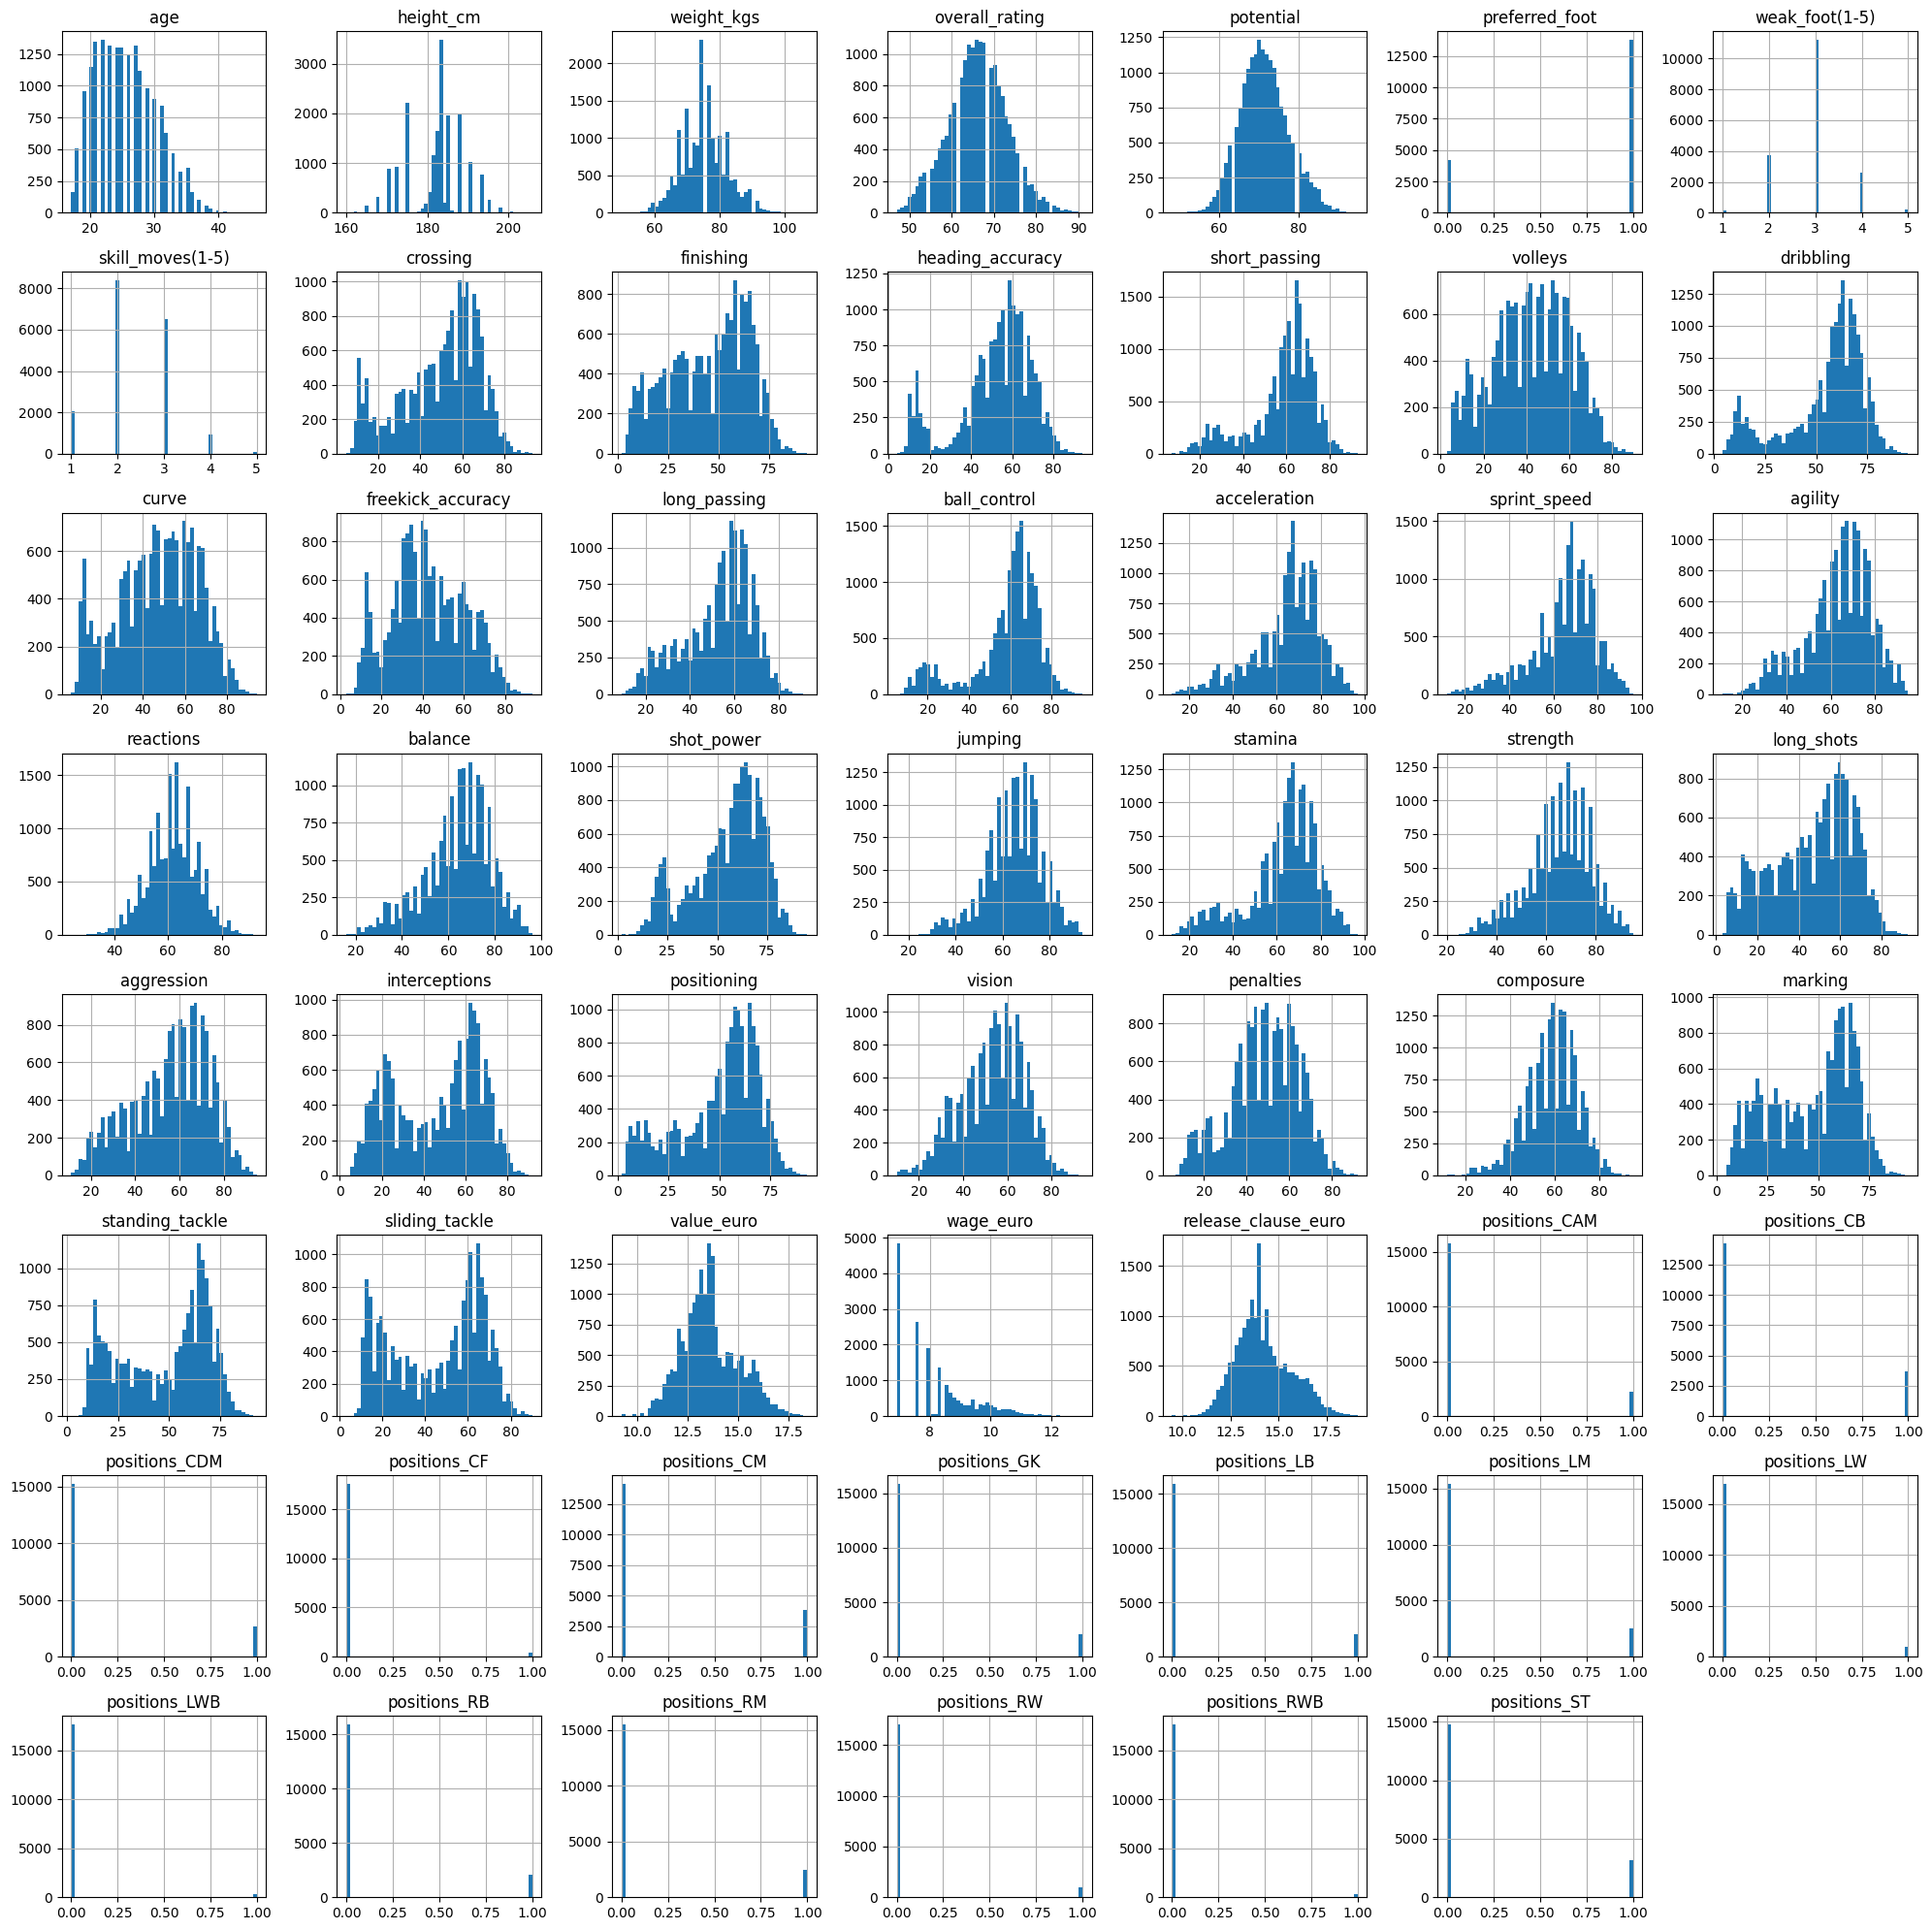

In [5]:
df.hist(bins=50, figsize=(20, 20))
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_encoded.csv')

In [3]:
df.shape

(17947, 59)

In [4]:
df.corr()['overall_rating'].sort_values(ascending=False)

overall_rating         1.000000
value_euro             0.935144
release_clause_euro    0.911245
reactions              0.855256
wage_euro              0.803881
composure              0.728691
potential              0.645983
short_passing          0.506723
vision                 0.506109
long_passing           0.489709
ball_control           0.464033
age                    0.461795
shot_power             0.444950
long_shots             0.428871
curve                  0.423272
nationality_encoded    0.422306
skill_moves(1-5)       0.417659
freekick_accuracy      0.400147
aggression             0.398159
crossing               0.398009
volleys                0.396200
dribbling              0.378291
stamina                0.368837
positioning            0.361473
strength               0.361342
penalties              0.350288
heading_accuracy       0.348068
finishing              0.341444
interceptions          0.323453
marking                0.294158
agility                0.274225
jumping 

In [5]:
df.drop(columns=['value_euro', 'release_clause_euro',
                 'wage_euro', 'potential',
                 'reactions', 'composure'], inplace=True)

In [6]:
X = df.drop(columns=['overall_rating'])
y = df['overall_rating']

In [7]:
X.shape

(17947, 52)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42,
                                                    shuffle=True)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5, p=1, weights='distance')
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(p=1, weights='distance')

In [33]:
y_pred = knn.predict(X_test_scaled)
y_train_pred = knn.predict(X_train_scaled)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Training Set:')
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('R2 score:', r2_score(y_train, y_train_pred))

print()

print('Test Set:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Training Set:
MAE: 0.0
MSE: 0.0
R2 score: 1.0

Test Set:
MAE: 1.961482007068277
MSE: 7.313759524282691
R2 score: 0.8460197263588201


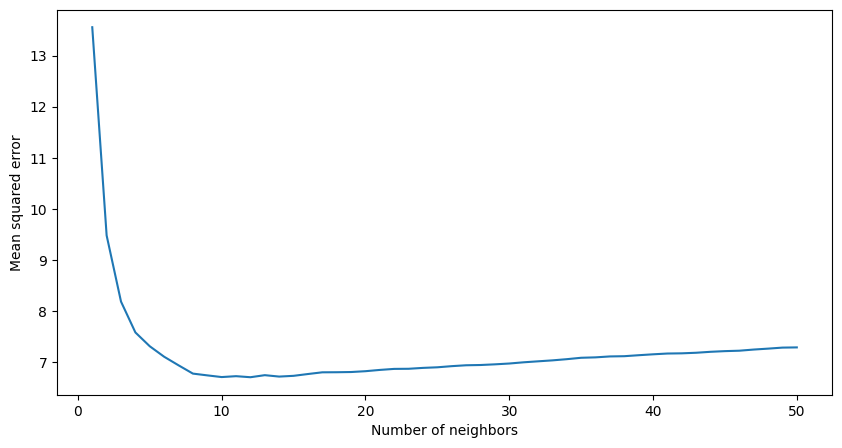

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

losses = []
min_loss = float('inf')
min_k = 0

for i in range(1, 51):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsRegressor(n_neighbors=i, p=1, weights='distance'))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    loss = np.mean((y_pred - y_test)**2)
    if loss < min_loss:
        min_loss = loss
        min_k = i
    losses.append(loss)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), losses)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean squared error')
plt.show()

In [40]:
print('Best k:', min_k)
print('Minimum loss:', min_loss)

Best k: 12
Minimum loss: 6.708420922462299


In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=min_k, p=1, weights='distance'))
scores = cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_squared_error')

print('Mean squared error:', -scores.mean())

Mean squared error: 6.717679592510882


In [42]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=min_k, p=1, weights='distance'))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Training Set:')
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('R2 score:', r2_score(y_train, y_train_pred))

print()

print('Test Set:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Training Set:
MAE: 0.0
MSE: 0.0
R2 score: 1.0

Test Set:
MAE: 1.8625988011806762
MSE: 6.708420922462299
R2 score: 0.8587642257157381


In [44]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

In [45]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Hàm tính độ hợp lệ (Validity) với ma trận khoảng cách sẵn có
def compute_validity_regression(X_train, y_train, H=5):
    # Tính toán ma trận khoảng cách giữa các điểm trong X_train
    distances = pairwise_distances(X_train)
    
    # Khởi tạo mảng validity
    validity = np.zeros(len(X_train))
    
    for i in range(len(X_train)):
        # Lấy H láng giềng gần nhất (bỏ qua chính điểm đó)
        nearest_neighbors = np.argpartition(distances[i], H+1)[:H+1]
        nearest_neighbors = nearest_neighbors[nearest_neighbors != i]  # Loại bỏ chính nó

        # Tính độ lệch chuẩn của giá trị mục tiêu của láng giềng
        neighbor_targets = y_train[nearest_neighbors]
        validity[i] = 1 / (np.std(neighbor_targets) + 0.1)  # Độ hợp lệ nghịch đảo với độ lệch chuẩn
    
    return validity

# Hàm dự đoán với Weighted KNN cho hồi quy
def weighted_knn_predict_regression(X_train, y_train, X_test, validity, K=5):
    # Tính toán ma trận khoảng cách giữa X_test và X_train
    distances = pairwise_distances(X_test, X_train)
    
    y_pred = []
    
    for i in range(len(X_test)):
        # Lấy K láng giềng gần nhất
        nearest_neighbors = np.argpartition(distances[i], K)[:K]
        
        # Tính trọng số dựa trên độ hợp lệ và khoảng cách
        d = distances[i][nearest_neighbors]
        weights = validity[nearest_neighbors] / (d + 0.5)
        weighted_average = np.dot(weights, y_train[nearest_neighbors]) / weights.sum()
        
        y_pred.append(weighted_average)
    
    return np.array(y_pred)

# Tính độ hợp lệ cho các mẫu trong tập huấn luyện
validity = compute_validity_regression(X_train, y_train, H=5)

# Dự đoán cho các mẫu trong tập kiểm tra
y_pred = weighted_knn_predict_regression(X_train, y_train, X_test, validity, K=5)

In [46]:
min_loss = float('inf')
H_optimal = 0

for H in range(1, 21):
    validity = compute_validity_regression(X_train, y_train, H=H)
    y_pred = weighted_knn_predict_regression(X_train, y_train, X_test, validity, K=H)
    if mean_squared_error(y_test, y_pred) < min_loss:
        min_loss = mean_squared_error(y_test, y_pred)
        H_optimal = H

print(H_optimal)

15


In [47]:
validity = compute_validity_regression(X_train, y_train, H=10)

# Dự đoán cho các mẫu trong tập kiểm tra
y_pred = weighted_knn_predict_regression(X_train, y_train, X_test, validity, K=10)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# print('Training Set:')
# print('MAE:', mean_absolute_error(y_train, y_train_pred))
# print('MSE:', mean_squared_error(y_train, y_train_pred))
# print('R2 score:', r2_score(y_train, y_train_pred))

print()

print('Test Set:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))


Test Set:
MAE: 1.7114302872940645
MSE: 6.135338573789571
R2 score: 0.8708296178816379


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

cv = 5

r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores cho {cv}-fold cross-validation: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores = -mse_scores
print(f"MSE cho {cv}-fold cross-validation: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE cho {cv}-fold cross-validation: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores cho 5-fold cross-validation: [0.87265766 0.86070455 0.8468467  0.8582674  0.85328369]
R^2 trung bình: 0.858 ± 0.009

MSE cho 5-fold cross-validation: [6.24270752 6.59634819 7.44481471 7.03528002 6.86389524]
MSE trung bình: 6.837± 0.405

MAE cho 5-fold cross-validation: [1.81481894 1.89518106 1.93686264 1.92878239 1.90760658]
MAE trung bình: 1.897 ± 0.044


In [1]:
import pandas as pd
df = pd.read_csv('data_encoded.csv')


<Axes: >

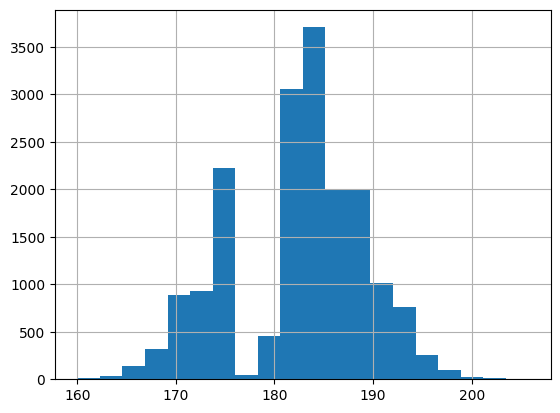

In [3]:
df['height_cm'].hist(bins=20)

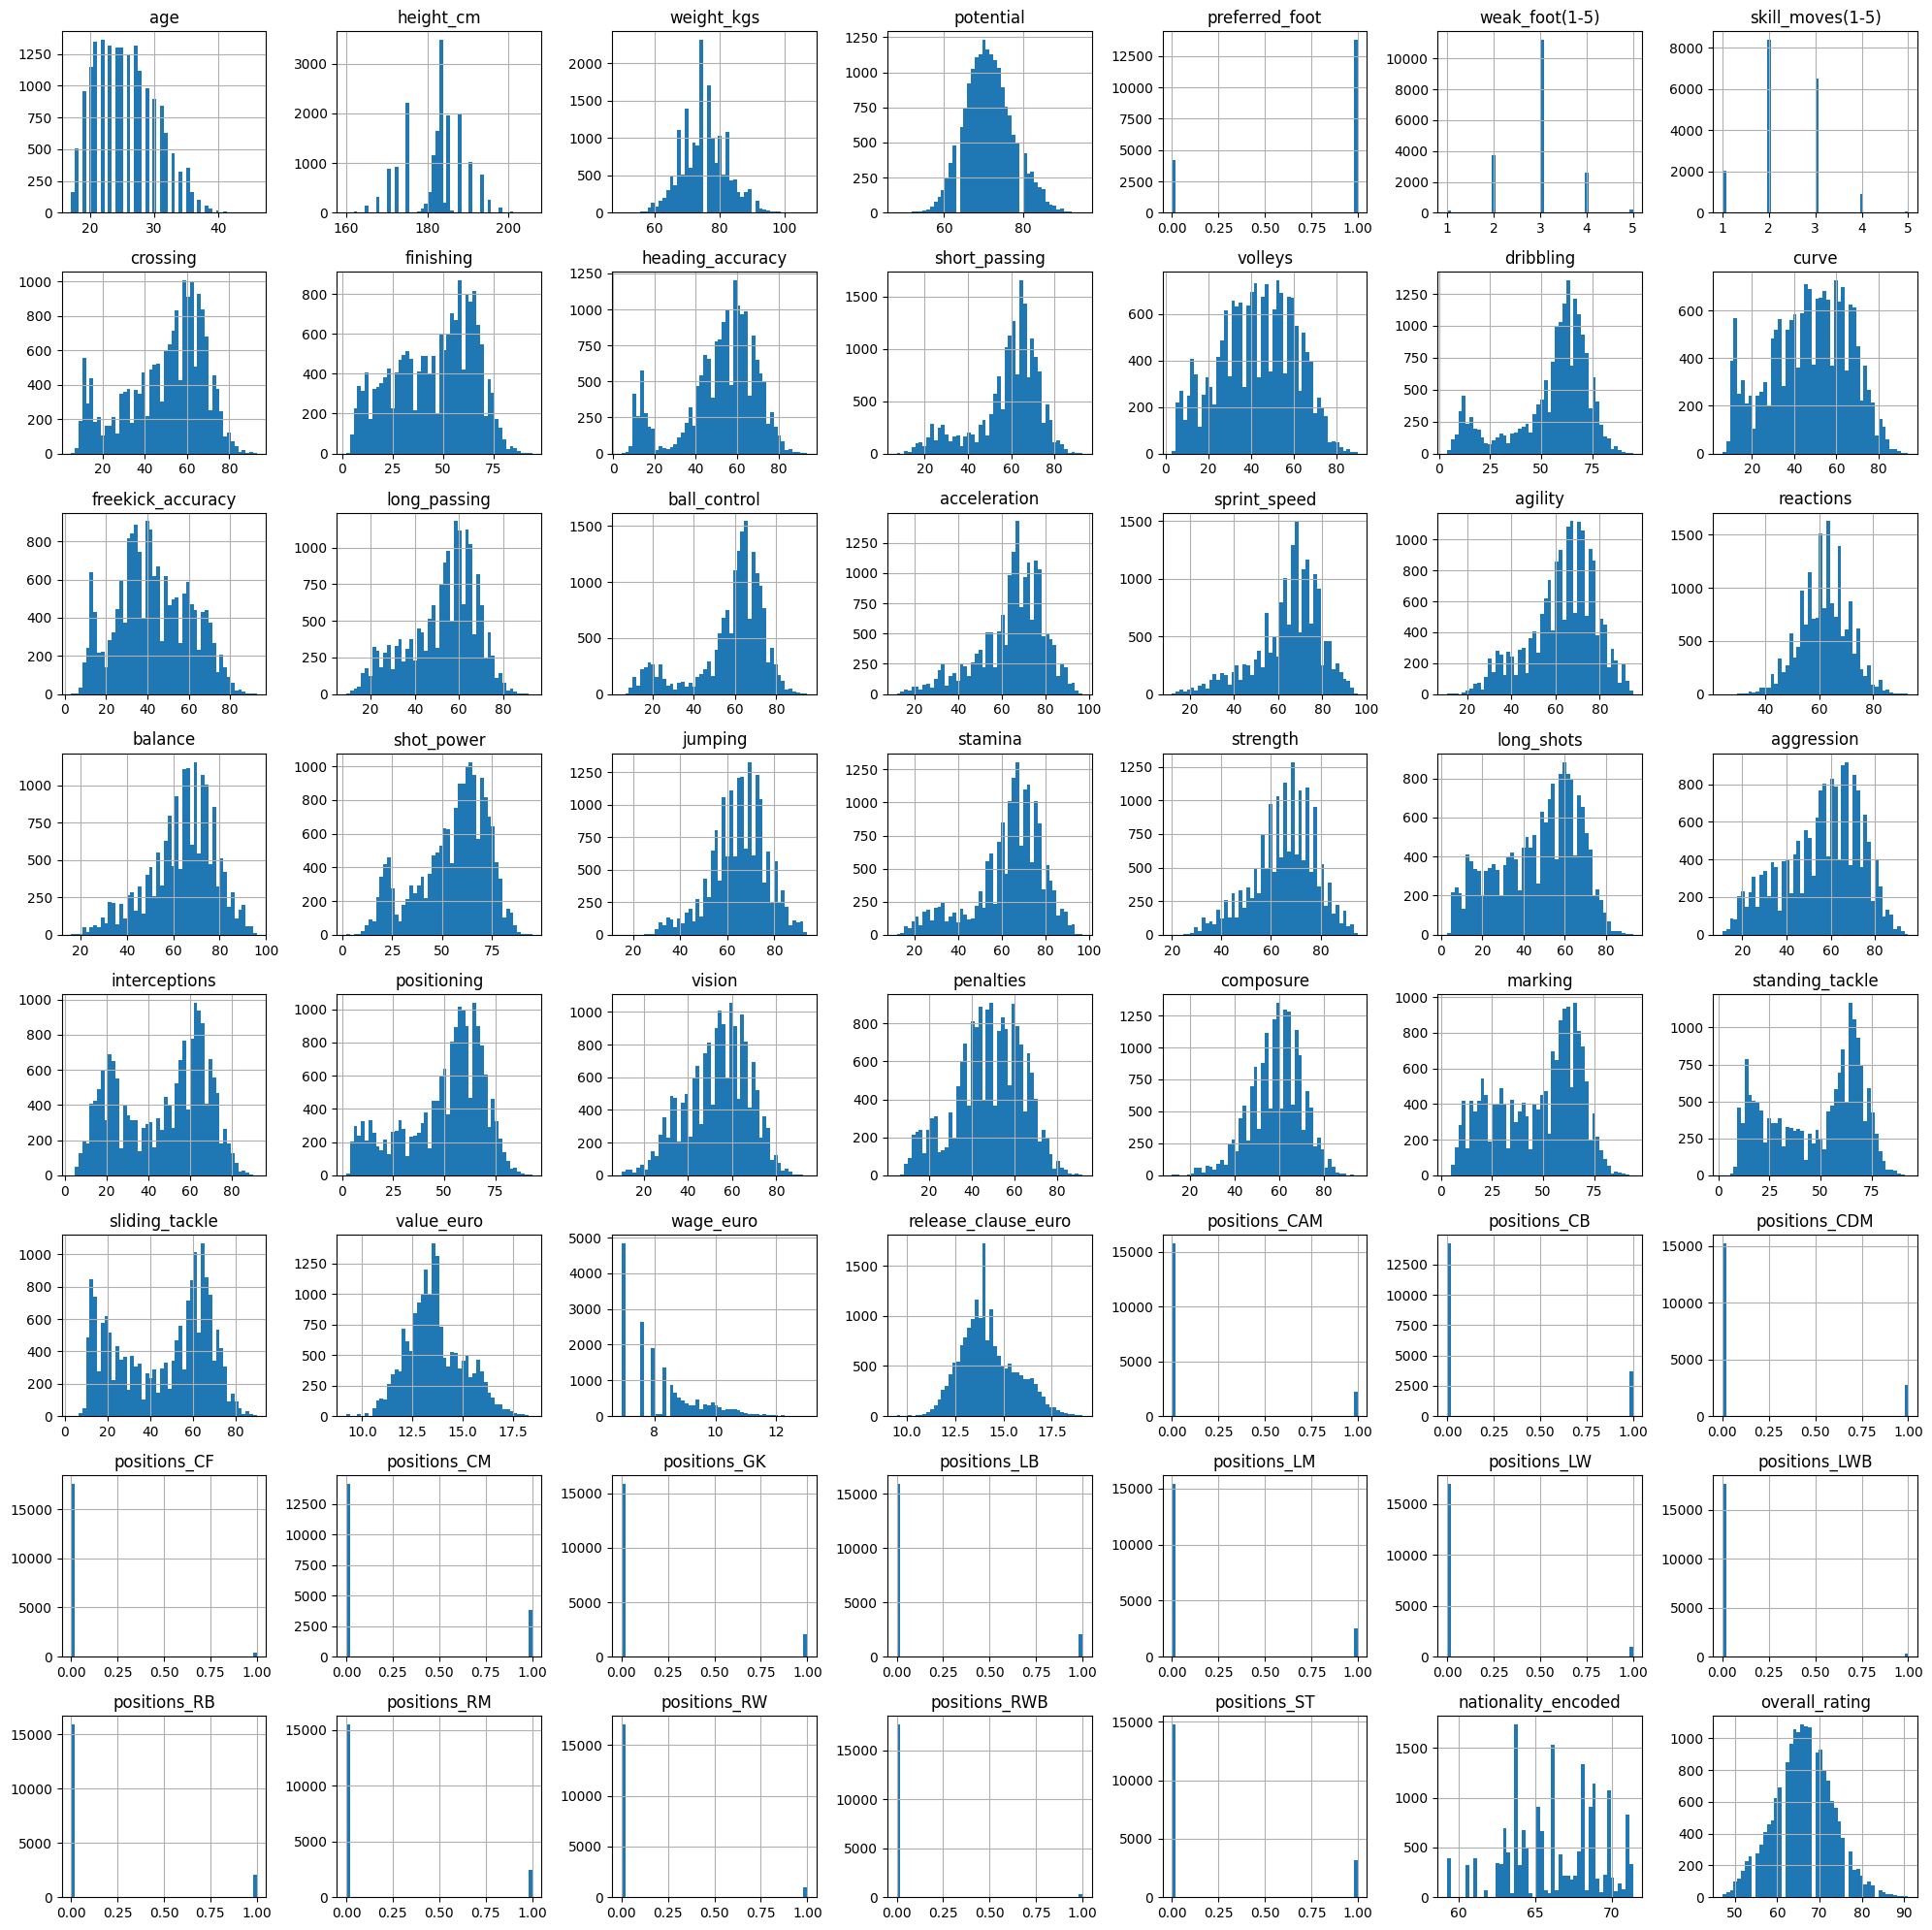

In [147]:
df.hist(bins=50, figsize=(20, 20))
plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns=['value_euro', 'release_clause_euro',
                 'wage_euro', 'reactions', 'composure',
                 'potential'], inplace=True)

In [132]:
X = df.drop(columns=['overall_rating'])
y = df['overall_rating']

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [134]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [135]:
y_pred = tree.predict(X_test)
y_train_pred = tree.predict(X_train)

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Training Set:')
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('R2 score:', r2_score(y_train, y_train_pred))

print()

print('Test Set:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Training Set:
MAE: 0.0
MSE: 0.0
R2 score: 1.0

Test Set:
MAE: 2.1927126859435067
MSE: 10.68978773190707
R2 score: 0.7749424991811424


In [137]:
def train_and_evaluate(max_depth=30):
    rg = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    rg.fit(X_train, y_train)
    y_train_pred = rg.predict(X_train)
    y_pred = rg.predict(X_test)

    train_MSE = mean_squared_error(y_train, y_train_pred)
    test_MSE = mean_squared_error(y_test, y_pred)

    train_MAE = mean_absolute_error(y_train, y_train_pred)
    test_MAE = mean_absolute_error(y_test, y_pred)

    train_R2 = r2_score(y_train, y_train_pred)
    test_R2 = r2_score(y_test, y_pred)

    return train_MSE, test_MSE, train_MAE, test_MAE, train_R2, test_R2, rg

In [138]:
max_depths = []
train_MSEs, test_MSEs = [], []
train_MAEs, test_MAEs = [], []
train_R2s, test_R2s = [], []
trees = []

for i in range(1, 20):
    train_MSE, test_MSE, train_MAE, test_MAE, train_R2, test_R2, rg = train_and_evaluate(i)
    max_depths.append(i)
    train_MSEs.append(train_MSE)
    test_MSEs.append(test_MSE)
    train_MAEs.append(train_MAE)
    test_MAEs.append(test_MAE)
    train_R2s.append(train_R2)
    test_R2s.append(test_R2)
    trees.append(rg)

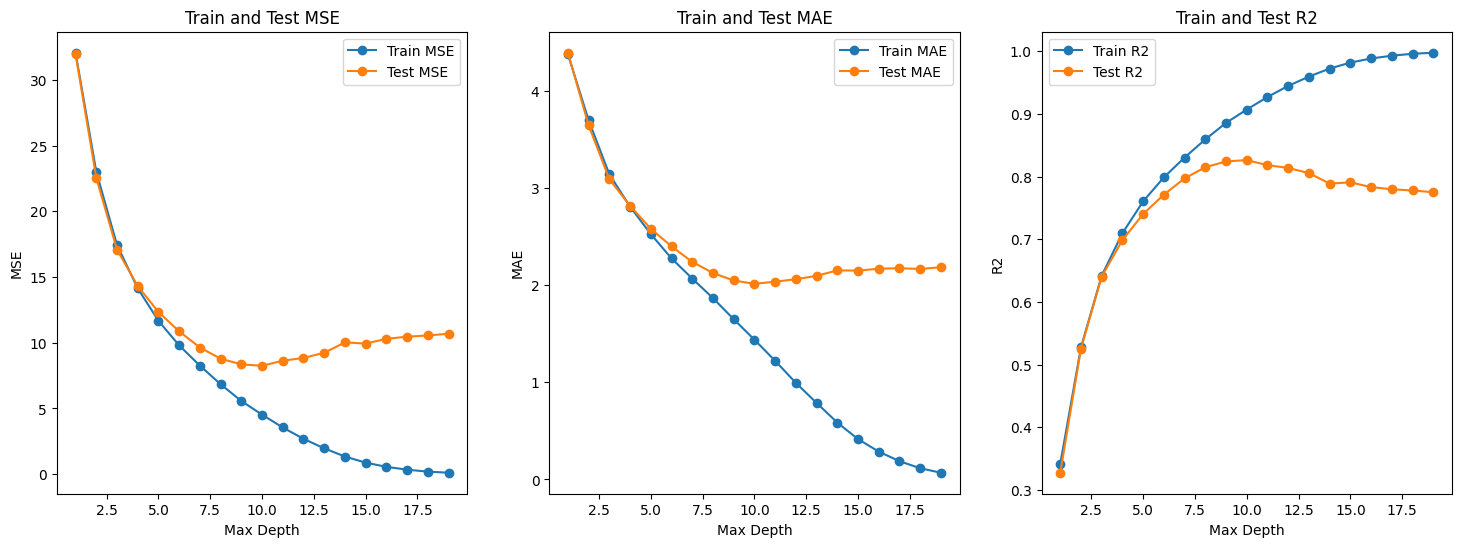

In [139]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(max_depths, train_MSEs, label='Train MSE', marker='o')
plt.plot(max_depths, test_MSEs, label='Test MSE', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('MSE')
plt.title('Train and Test MSE')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(max_depths, train_MAEs, label='Train MAE', marker='o')
plt.plot(max_depths, test_MAEs, label='Test MAE', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('MAE')
plt.title('Train and Test MAE')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(max_depths, train_R2s, label='Train R2', marker='o')
plt.plot(max_depths, test_R2s, label='Test R2', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R2')
plt.title('Train and Test R2')
plt.legend()

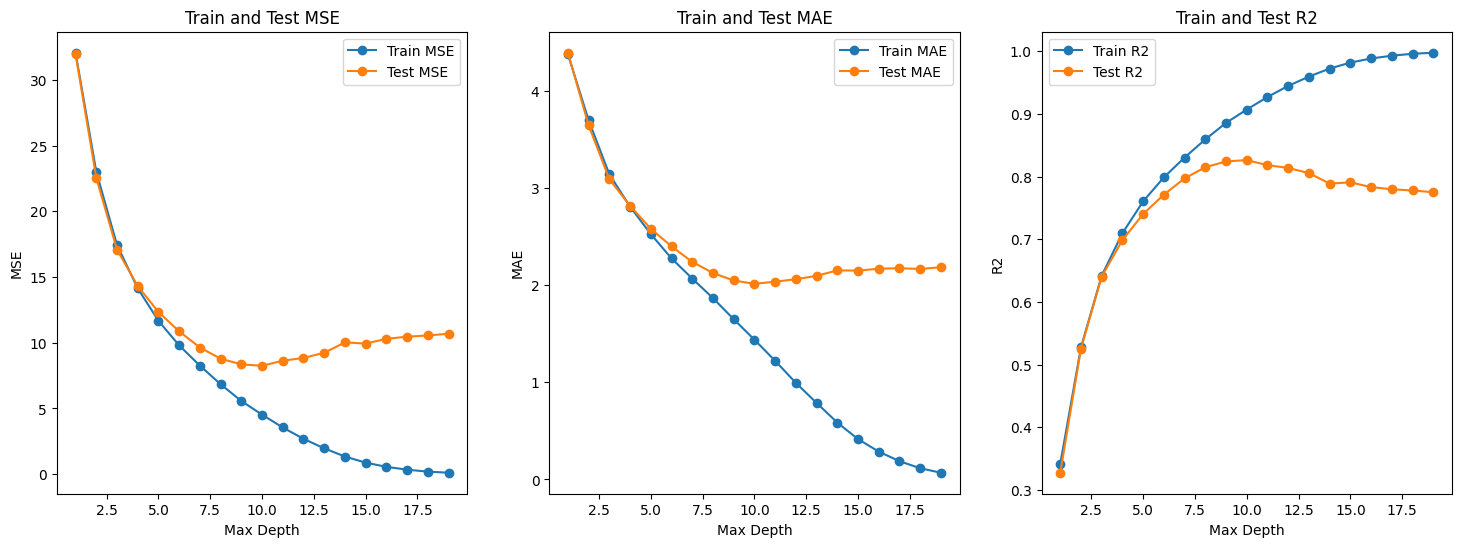

In [112]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(max_depths, train_MSEs, label='Train MSE', marker='o')
plt.plot(max_depths, test_MSEs, label='Test MSE', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('MSE')
plt.title('Train and Test MSE')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(max_depths, train_MAEs, label='Train MAE', marker='o')
plt.plot(max_depths, test_MAEs, label='Test MAE', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('MAE')
plt.title('Train and Test MAE')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(max_depths, train_R2s, label='Train R2', marker='o')
plt.plot(max_depths, test_R2s, label='Test R2', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R2')
plt.title('Train and Test R2')
plt.legend()